<a href="https://colab.research.google.com/github/RealElvince/Cardiovascular-Disease-/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program classifies whether a person has hear disease(Cardiovascular disease) or not.


import useful libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

load the data

In [2]:
from google.colab import files
uploaded_file=files.upload()

Saving heart.csv to heart.csv


store the data in a variable (df)

In [5]:
df=pd.read_csv('heart.csv')

# print first 10 rows of the data

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


get the shape of the data

In [7]:
data_shape=df.shape
print('The shape of the data frame is:',data_shape)

The shape of the data frame is: (1025, 14)


count /check number of empty values in each column.
Data preprocessing

In [8]:
count_of_empty_values=df.isnull().sum()

print(count_of_empty_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


check for duplicate values

In [13]:
sum_of_duplicate_values=df.duplicated().sum()
print('The sum of duplicate values is:',sum_of_duplicate_values)

The sum of duplicate values is: 723


drop duplicate values

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

View some basic statistics of the data

In [15]:
basic_stats_of_the_data=df.describe()
print(basic_stats_of_the_data)

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

Get a count of the number of patients with cardiovscular disease or without

In [11]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Visualize the data

<Axes: >

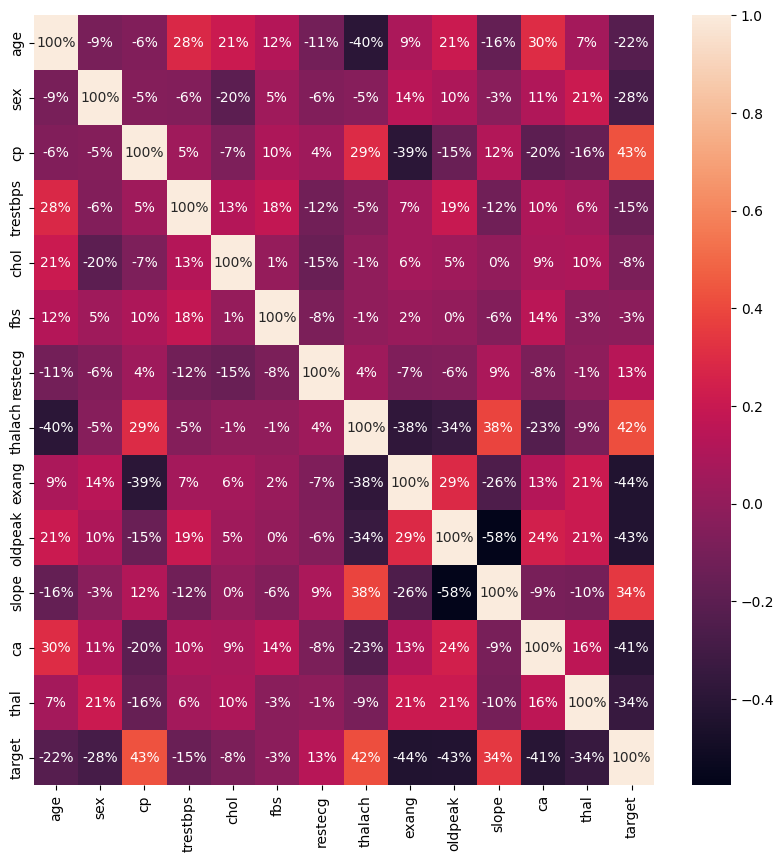

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

Split the data into feature data and target data

In [33]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

Split the data again into 80% training data and 20% into test data .

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

Feature scaling
scale the values in the data to between 0 and 1 inclusive

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

testing best model to use for prediction Between Logistic Regression and Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=10)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

test the model accuracy on the training data

In [51]:
model=forest
training_data_accuracy=model.score(X_train,Y_train)
print('Training data accuracy using Random Forest Classifier is:',training_data_accuracy)

Training data accuracy using Random Forest Classifier is: 0.991701244813278


Conclusion ,1.0 accuracy ,means the model always predict the correct data label.
Our training accuracy is 0.991701244813278.

test model accuracy on the test data

In [43]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,model.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

# print the confusion matrix
print(cm)

#print model accuracy on the test data
print('Model Test Accuracy ={}'.format((TN+TP)/(TN+TP+FN+FP)))

[[18  8]
 [ 5 30]]
Model Test Accuracy =0.7868852459016393


testing Logistic Regression Accuracy

In [49]:
from sklearn.linear_model import LogisticRegression

model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
training_data_accuracy_2=model_LR.score(X_test,Y_test)
print('The model train accuracy  using Logistic Regression is :',training_data_accuracy_2)

The model train accuracy  using Logistic Regression is : 0.7704918032786885


In conclusion ,the best model for this dataset is Random ForesT Classifier.